# India Covid-19 Vaccination Data Analysis

Vaccination for Covid-19 in India was started on 16 January 2021. Two vaccines received approval for emergency use in India at the onset of the programme, i.e.,<br> 
i) Covishield (a brand of the Oxford–AstraZeneca vaccine manufactured by the Serum Institute of India) and <br>
ii) Covaxin (developed by Bharat Biotech). <br>
In April 2021, Sputnik V (distributed by Dr. Reddy's Laboratories) was approved as a third vaccine, which was deployed by May 2021. Each vaccine is divided into two doses.<br> 

Here i will analyse the data set containing all the information of vaccination done in past 5 months. The data set contain the number of people vaccinated daily in different states of the country. The data set in this analysis is verified and is collected from official website of cowin (https://www.cowin.gov.in/).

The tools that are used for analysis are:

- Pandas
- Numpy
- Matplotlib
- Seaborn


## Install required libraries

First we install all the libraries of python that are used in this analysis and then import them in our notebook. 

In [1]:
# !pip install pandas --upgrade --quiet
# !pip install numpy --upgrade --quiet
# !pip install matplotlib --upgrade --quiet
# !pip install seaborn --upgrade --quiet


In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

First we will check files in our directory using `os` library. Then we will load our data set file in the notebook.

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'covid_vaccine_statewise.csv',
 'environment-linux.yml',
 'environment-macos.yml',
 'environment.yml',
 'population.csv',
 'registration.csv',
 'zerotopandas-course-project.ipynb']

Let's load our covid_vaccine_statewise csv file now.

In [4]:
raw_vaccine_data = pd.read_csv("covid_vaccine_statewise.csv")

In [5]:
raw_vaccine_data.shape

(4552, 18)

In [6]:
raw_vaccine_data.head(5)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280


In [7]:
raw_vaccine_data.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered', 'AEFI',
       '18-30 years (Age)', '30-45 years (Age)', '45-60 years (Age)',
       '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

## Data Preparation and Cleaning

In this section, we will do data cleaning and prepare data for easy furthur analysis.

Let's get the details about the data like data type and missing values.

In [8]:
raw_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           4552 non-null   object 
 1   State                                4552 non-null   object 
 2   Total Individuals Vaccinated         4551 non-null   float64
 3   Total Sessions Conducted             4551 non-null   float64
 4   Total Sites                          4551 non-null   float64
 5   First Dose Administered              4551 non-null   float64
 6   Second Dose Administered             4551 non-null   float64
 7   Male(Individuals Vaccinated)         4551 non-null   float64
 8   Female(Individuals Vaccinated)       4551 non-null   float64
 9   Transgender(Individuals Vaccinated)  4551 non-null   float64
 10  Total Covaxin Administered           4551 non-null   float64
 11  Total CoviShield Administered 

- Above data contains 18 columns in which 15 columns are float64, 2 are object and 1 is int64 type.
- As we know the "Updated On" column contains date values so we have to change it into date type.

We can convert date column from object to datetime by using `pd.to_datetime` method.

In [9]:
raw_vaccine_data["Updated On"] = pd.to_datetime(raw_vaccine_data["Updated On"],dayfirst=True)

Now check the data types of our data again. 

In [10]:
raw_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           4552 non-null   datetime64[ns]
 1   State                                4552 non-null   object        
 2   Total Individuals Vaccinated         4551 non-null   float64       
 3   Total Sessions Conducted             4551 non-null   float64       
 4   Total Sites                          4551 non-null   float64       
 5   First Dose Administered              4551 non-null   float64       
 6   Second Dose Administered             4551 non-null   float64       
 7   Male(Individuals Vaccinated)         4551 non-null   float64       
 8   Female(Individuals Vaccinated)       4551 non-null   float64       
 9   Transgender(Individuals Vaccinated)  4551 non-null   float64       
 10  Total Covaxi

We can see that data type of "Updated On" column is changed into datetimedata type.

Now we will count the number of missing values in each column.

In [42]:
raw_vaccine_data.isnull().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated              1
Total Sessions Conducted                  1
Total Sites                               1
First Dose Administered                   1
Second Dose Administered                  1
Male(Individuals Vaccinated)              1
Female(Individuals Vaccinated)            1
Transgender(Individuals Vaccinated)       1
Total Covaxin Administered                1
Total CoviShield Administered             1
AEFI                                   2125
18-30 years (Age)                      2125
30-45 years (Age)                      2125
45-60 years (Age)                      2125
60+ years (Age)                        2125
Total Doses Administered                  0
dtype: int64

So, we will fill our null values with 0.

In [46]:
raw_vaccine_data.fillna(0,inplace=True)
raw_vaccine_data.head(3)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
123,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,23
124,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,23
125,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,42


Now let's see the unique states of india for which the data is stored in this file.

In [11]:
raw_vaccine_data.State.unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In above listed states, India is also present which is not the state. May be it contains the sum of values in all states. But it will change the values in our analysis. So we will will drop the rows containing India as State by using `drop()` function.

In [12]:
raw_vaccine_data[raw_vaccine_data.State == "India"].count()

Updated On                             123
State                                  123
Total Individuals Vaccinated           123
Total Sessions Conducted               123
Total Sites                            123
First Dose Administered                123
Second Dose Administered               123
Male(Individuals Vaccinated)           123
Female(Individuals Vaccinated)         123
Transgender(Individuals Vaccinated)    123
Total Covaxin Administered             123
Total CoviShield Administered          123
AEFI                                    64
18-30 years (Age)                       64
30-45 years (Age)                       64
45-60 years (Age)                       64
60+ years (Age)                         64
Total Doses Administered               123
dtype: int64

Here number of rows containing India as state are 123. So after deleting these rows our dataframe should contain rows

4552-123=4429.

In [13]:
raw_vaccine_data.drop(raw_vaccine_data[raw_vaccine_data["State"] == "India"].index, inplace=True)

In [14]:
raw_vaccine_data.shape

(4429, 18)

In [15]:
raw_vaccine_data.head(5)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
123,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
124,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
125,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42
126,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89
127,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124


Here, we can see that our index has changed in the dataframe so lets reset our index using `reset_index` method

In [16]:
vaccine_data = raw_vaccine_data.reset_index(drop=True)

In [17]:
vaccine_data.head(5)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
1,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23
2,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42
3,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89
4,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124


Now, our index has changed and our data has also cleaned up. We can now do real time analysis in the data set.

## Exploratory Analysis and Visualization

In this section, we will explore relationships between columns by doing visualization using matplotlib and seaborn library in python.

### States

Lets look at the total number of people that have vaccinated in different parts of the country from January till now.

So, lets calculate values of total vaccination done in unique states by using `groupby` method in pandas.

In [18]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16

In [19]:
vaccination = vaccine_data.groupby("State")[["Total Doses Administered"]].max().sort_values("Total Doses Administered",ascending=False)

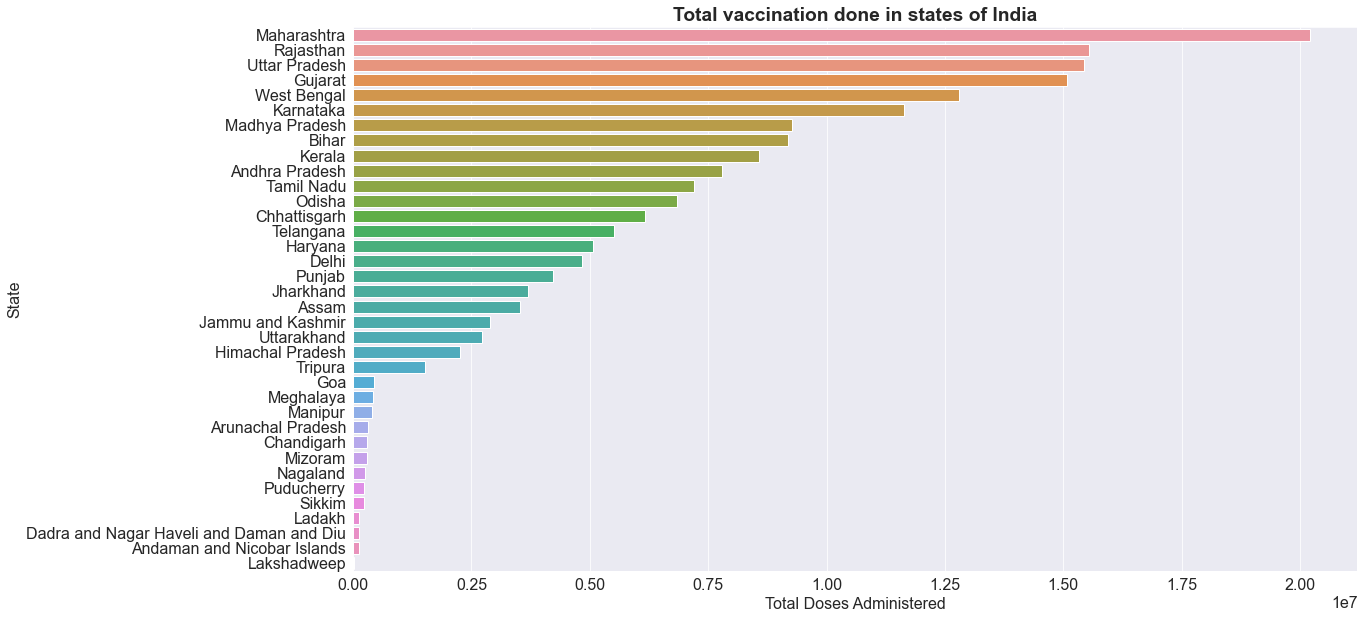

In [20]:
plt.figure(figsize=(18,10))
plt.title("Total vaccination done in states of India", fontweight="bold")

sns.barplot(x=vaccination["Total Doses Administered"], y=vaccination.index);

From above graph, we can find that Maharashtra is the maximum vaccinated state in India. But it can also be due to the large number of population in Maharashtra. As the population is large and area of the state is also big so may be the vaccination centers are more. Because of this, it can be the maximum vaccinated state.
So, to get the accurate percentage of people vaccinated in a particular state we need to find the total population in the state and according to that how many people are vaccinated in a particular area.

## Population

To get the percentage of people vaccinated, we have to load the population data set to get the population of different states. So lets load it first.

In [21]:
population = pd.read_csv("population.csv")

In [22]:
population.head(5)

,State,Till year 2021
0,Uttar Pradesh,240000000.0
1,Maharashtra,124000000.0
2,Bihar,127000000.0
3,West Bengal,100000000.0
4,Madhya Pradesh,87000000.0


Now, we have to merge our vaccination data with population data to find the percentage of vaccination.

In [23]:
total_vaccination = pd.merge(vaccination,population,on="State")
total_vaccination.head(5)

,State,Total Doses Administered,Till year 2021
0,Maharashtra,20201111,124000000.0
1,Rajasthan,15544817,82500000.0
2,Uttar Pradesh,15436461,240000000.0
3,Gujarat,15086347,64300000.0
4,West Bengal,12805341,100000000.0


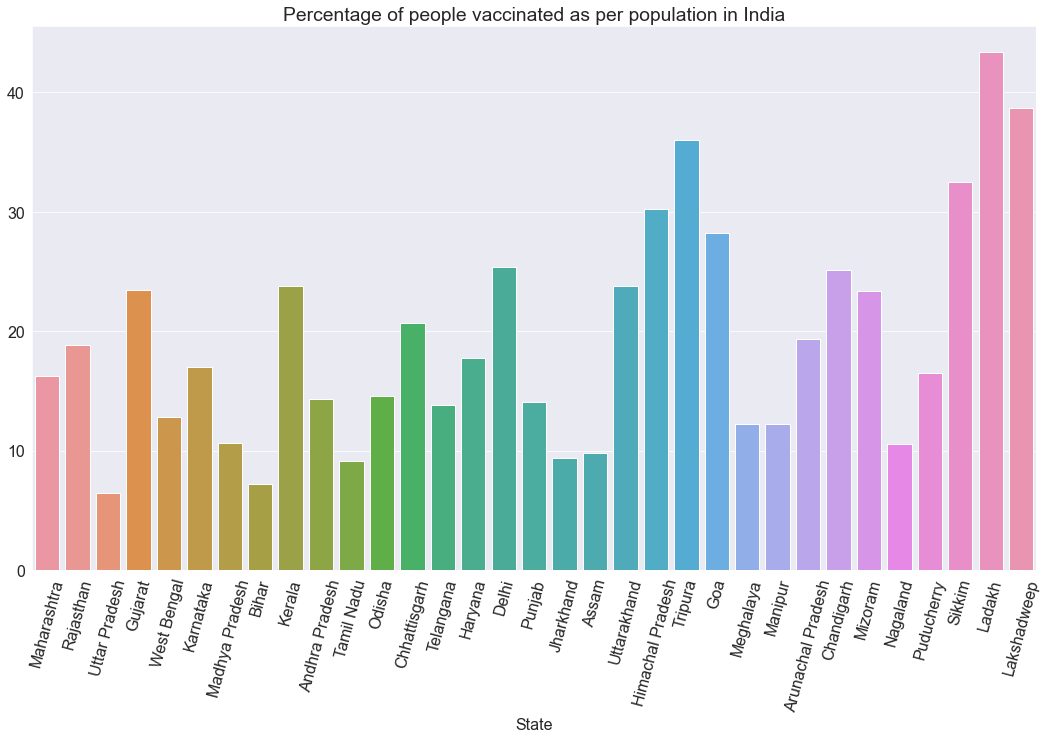

In [24]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=75)
plt.title("Percentage of people vaccinated as per population in India")
vaccine_percent = total_vaccination["Total Doses Administered"] *100/total_vaccination["Till year 2021"]
sns.barplot(x=total_vaccination.State, y=vaccine_percent);

Now, we can see from above graph that Ladakh is the maximum vaccinated state as per the population in India. Earlier Maharashtra war there due to the large number of population. Now Maharashtra is only 15% vaccinated while Ladakh is 45% vaccinated.


## Gender

Lets look at the people vaccinated on the basis of gender in the country. We know that women and other binary genders are not given much privilege in our society. But vaccination is the most important thing that has to be done to each and every person in the society for the measure of health and safety.

Lets calculate the total number of male, female and other binary genders vaccinated in the country.

In [25]:
male = vaccine_data.groupby("State")[["Male(Individuals Vaccinated)"]].max().sum()
female = vaccine_data.groupby("State")[["Female(Individuals Vaccinated)"]].max().sum()
others = vaccine_data.groupby("State")[["Transgender(Individuals Vaccinated)"]].max().sum()

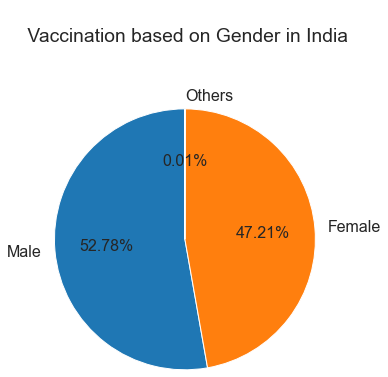

In [26]:
plt.axis("equal")
plt.title(" \n Vaccination based on Gender in India\n\n\n\n")
plt.pie([male[0],female[0],others[0]], 
        labels=["Male","Female","Others"], 
        autopct="%0.2f%%", 
        startangle=90,
        radius=1.5);

From above chart, we can conclude that there is not much difference between the male and female vaccination but percent of others are very less due to their less number of population in the country.  

## Asking and Answering Questions

Lets ask some questions related to our data set and try to answer them by doing analysis of data using data frame operations and visualizations. 



### Q1: Find that how many number of people are partially vaccinated and fully vaccinated in each state ?

Here partially vaccinated means people vaccinated with first dose and fully vaccinated means people vaccinated with both first and second dose.

To calculate this, we have to find the maximum number of first and second dose in each state by using `groupby()` and `max()` function in pandas.

In [27]:
doses = vaccine_data.groupby("State")[["First Dose Administered","Second Dose Administered"]].max()


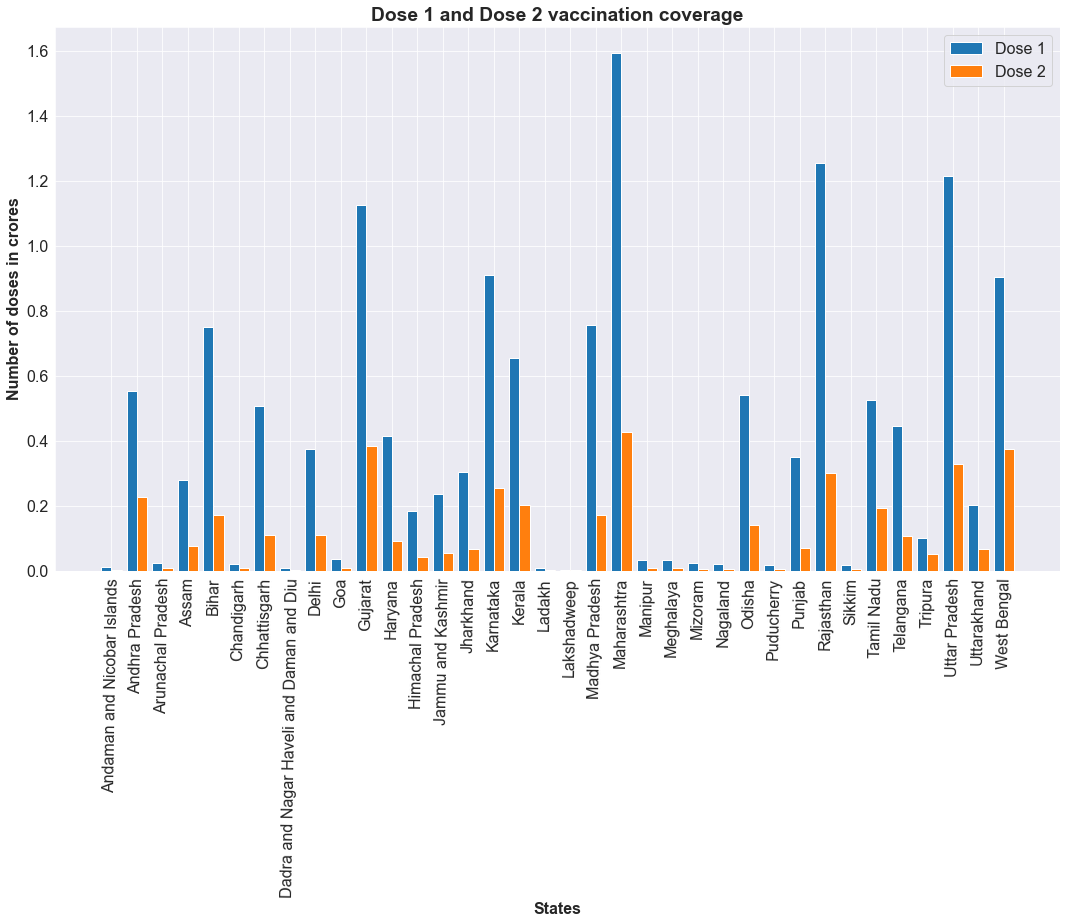

In [28]:
plt.figure(figsize=(18,10))

xpos = np.arange(len(doses.index))
plt.xticks(xpos,doses.index,rotation=89)


plt.bar(xpos-0.2,doses["First Dose Administered"]/1e7, label="Dose 1",width=0.4)
plt.bar(xpos+0.2,doses["Second Dose Administered"]/1e7, label="Dose 2",width=0.4)


plt.xlabel("States",fontweight="bold")
plt.ylabel("Number of doses in crores",fontweight="bold")
plt.title("Dose 1 and Dose 2 vaccination coverage",fontweight="bold")
plt.legend();

From above graph, we can see that in each state number of first dose is high as compared to second dose because second dose can be taken after 28 days of first dose. So it means that when people those have taken first dose will take second dose, the bar of second dose will become high.

### Q2: How many people are vaccinated with Covaxin and Covishield ?

There are two types of vaccines available in India - Covaxin and Covishield. Some people are getting vaccinated with Covaxin and some are with Covishield.

Lets find the percentage of people vaccinated with these two types of vaccine.

To calculate this, we have to find the maximum number of each vaccines in every state and then sum it to get total of it in whole country.

We will use `groupby`, `max`, `sum` methods of pandas.

In [29]:
vaccine_type = vaccine_data.groupby("State")[["Total Covaxin Administered", "Total CoviShield Administered"]].max().sum()
vaccine_type

Total Covaxin Administered        19408310.0
Total CoviShield Administered    165784294.0
dtype: float64

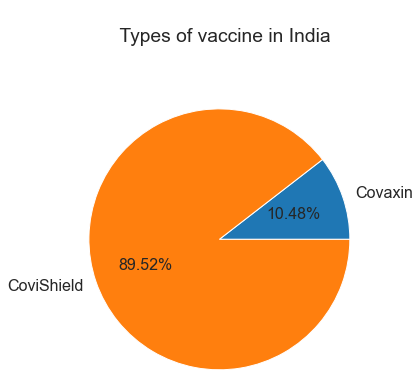

In [30]:
plt.axis("equal")
plt.title(" \n  Types of vaccine in India\n\n\n\n")
plt.pie(vaccine_type, 
        labels=["Covaxin","CoviShield"], 
        autopct="%0.2f%%",
        radius=1.5);

It can be clearly seen that covishield has been widely used for vaccination than covaxin. It is due to the production of vaccine. CoviShield has been producing in large amount in many companies of the countries while Covaxin is not producing in the sufficient amount. That's why availability of CovidShield is more in vaccine centers in comparison to Covaxin.  

Both vaccines are equally effective in terms of defeating corona virus. So above data does not shows that CoviShield is more effective that's why it has been used more. Above data has so much of difference because of its production only. 

### Q3: Categories vaccination on the basis of age ?

In India, government has first started the vaccination for the age group of 45 and above. It is due the fact that corona virus was affecting the older people because of the low immune power. That's why it was neccessary to give immunization to older people first. 

After that, when many people of age 45+ was vaccinated with their first dose then drive for 18+ people has also started.
So, let us find the number people vaccinated in different age group of our country.

To calculate this, we will first calculate the total people state wise and then add it up to find the total number of people in each group.

In [31]:
age = vaccine_data.groupby("State")[["18-30 years (Age)", "30-45 years (Age)", "45-60 years (Age)", "60+ years (Age)"]].max().sum()


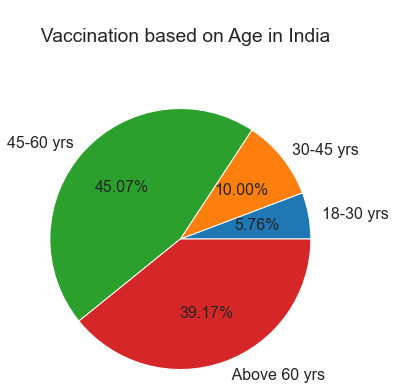

In [32]:
plt.axis("equal")
plt.title(" \n  Vaccination based on Age in India\n\n\n\n")
plt.pie(age, 
        labels=["18-30 yrs","30-45 yrs","45-60 yrs"," Above 60 yrs"], 
        autopct="%0.2f%%",
        radius=1.5);

The major part in above chart is above 45 years of age group only. Because the vaccination of this age groups has started early so the number of people lies more in this.

In the coming days, 18+ people will also get vaccinated and soon children from 2+ years will also start getting the immunization. 

### Q4: How many percent of people are having adverse effect after immunization ?

We have to find the percentage of people getting adverse effect after getting vaccinated. Adverse effects can be any allergy, breathing problem or any other effect due the chemicals used in vaccine.

We will first find the adverse effects in each state. For that we will calculate the total people having effects in each state then divide it by the total vaccination done in that particular state to find the percentage.

In [33]:
adverse = vaccine_data.groupby("State")[["AEFI","Total Doses Administered"]].max()
adverse.head(5)

,AEFI,Total Doses Administered
State,,
Andaman and Nicobar Islands,2.0,115911
Andhra Pradesh,325.0,7799705
Arunachal Pradesh,263.0,308245
Assam,178.0,3531930
Bihar,186.0,9188143


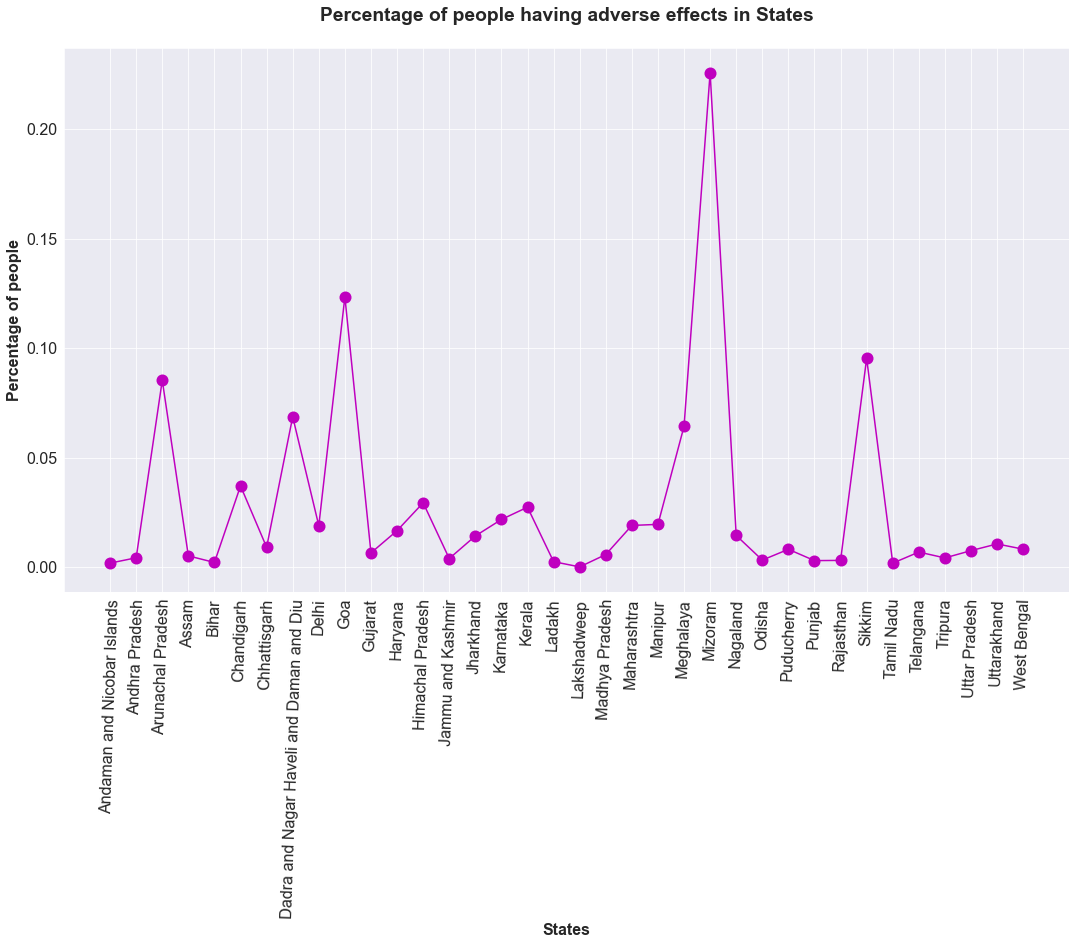

In [34]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=88)

plt.xlabel("States", fontweight="bold")
plt.ylabel("Percentage of people", fontweight="bold")
plt.title("Percentage of people having adverse effects in States\n", fontweight="bold")

# plt.plot(adverse.index, adverse["AEFI"],"o-", ms=10, mew=2,c="m");
plt.plot(adverse.index, adverse["AEFI"] * 100/adverse["Total Doses Administered"],"o-", ms=10, mew=2,c="m");

As we can see that the percentage of people having bad effects are very low. In most of the states the percentage is less than 0.05% and the maximum percent is approx 0.25% in Mizoram which is also not very high percent.  

Now, lets find the total number of people that faced problems after vaccination in the whole country.

In [35]:
effects = adverse["AEFI"].sum()
no_effects = adverse["Total Doses Administered"].sum() - effects


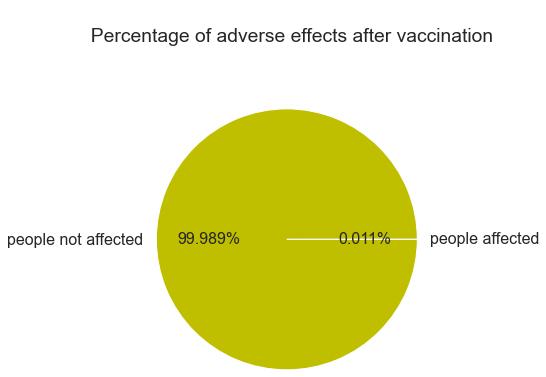

In [36]:
plt.axis("equal")
plt.title(" \n  Percentage of adverse effects after vaccination\n\n\n\n")

plt.pie([effects,no_effects], 
        labels=["people affected","people not affected"], 
        autopct="%0.3f%%",
        colors=["r","y"],
        radius=1.5);

From above chart, it can be clearly concluded that percentage of adverse effects is very very low as compared to the people who are not affected with the vaccine. It shows that scientist and doctors who have created these vaccines are very effective against the corona virus.

So, we are getting right immunization to fight with corona virus.

### Q5: In which month maximum first dose has been taken by people ?

Our data set conatins the data of 5 months - from January to May. So we have to calcutate the sum of first dose taken in all states in each month.

To calculate this we will use `pd.DatetimeIndex()` method in pandas to find the data month wise.

In [37]:
month = pd.DatetimeIndex(vaccine_data["Updated On"]).month

In [38]:
month_state_data = vaccine_data.groupby([month,"State"])[["First Dose Administered"]].max()
month_state_data.reset_index(inplace=True)

In [39]:
month_data = month_state_data.groupby("Updated On")[["First Dose Administered"]].sum()
month_data

,First Dose Administered
Updated On,
1,3127102.0
2,11141302.0
3,55067955.0
4,125376487.0
5,144270200.0


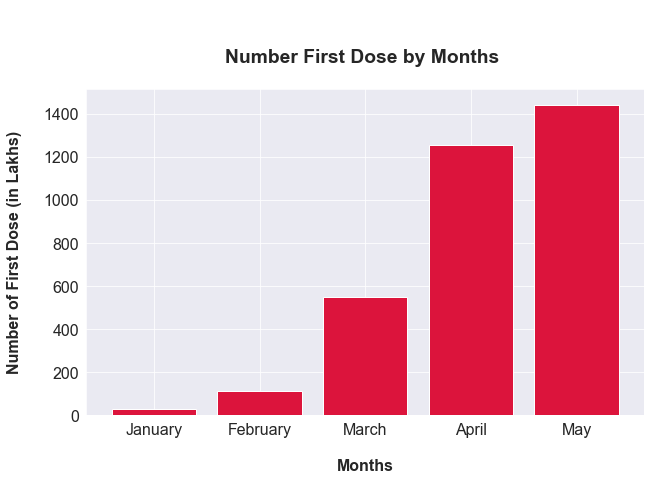

In [40]:
plt.figure(figsize=(10,6))
plt.xlabel("\nMonths",fontweight="bold")
plt.ylabel("Number of First Dose (in Lakhs)\n",fontweight="bold")
plt.title("\n\nNumber First Dose by Months \n",fontweight="bold")

plt.bar(["January", "February", "March", "April", "May"], month_data["First Dose Administered"]/1e5, color="crimson");

It can be clearly concluded from above graph that in month of may maximum number of vaccines are taken. It is because from april people get more aware about the effects of vaccine and its uses. They become aware about the fact that vaccine is really important for their safety and is necessary to fight against this dangerous disease corona virus.

Also in start of January, many people does not properly know about the vaccine and its uses. As the months pases, they get realised that vaccine is very important to increase their immune power and also the chances of having side effects are also very low.

## Inferences and Conclusion

We have concluded so much from this analysis. Here is the summary of few of them:-

- We infer that maximum vaccination is done in the Maharashtra but as compared to poplulation, Ladakh has the highest percentage of people that vaccinated in last 5 months.

- Vaccination is done unbiasedly in case of gender. Men, women and other binary gender are actively participating in this vaccination campaign. This shows that people in India are concern about their safety and are getting vaccinated.

- Then we have seen that number of first dose is very high than second dose in each state which means that people have started taking their first dose and after some time they will go for second one also.

- CoviShield is being used in large number in the whole country in comparison to Covaxin as the CoviShield is producing in huge amount in every part of the country.

- The age group above 45 years has been vaccinated more in comparison to others as the vaccination of this group has started early.

- The main and important analysis we have done for the adverse effects of vaccines. We infer that only 0.011% of people are facing adverse effects after getting immunized in the whole country which shows that the production of vaccine is successful in India. The vaccine made by Indian doctors proved to be efficient vaccine to fight against corona virus.


 

## References and Future Work

Following are the resources that are used in this analysis for data set and tools :-

- Dataset: https://www.kaggle.com/datasets
- Pandas guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets


#### Future work
 - This analysis is done on the basis of the people reported to the vaccination centers and have taken vaccines. But we can also do the analysis on the basis of the registrations done in the CoWin App. We can analye that how many people have registered for the vaccination but didn't get the slot for vaccine due to the shortage of vaccine. Also we can analyse that how many people have registered for vaccine but didn't reach the centers for vaccination. These types of analysis we will definitely do in our future work.